# Highlights 1 
#### (updates with Existing Version)

[Existing Version](https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb)

1. Authenticate Kaggle
2. Kaggle dataset download with Api
3. With Curl DataSet Download

## References

- [Ml1 github](https://github.com/fastai/fastai1/tree/15bc02c61673400178fbdaf3417485755c299561/courses/ml1)
- [Lec 1](https://www.youtube.com/watch?v=CzdWqFTmn0Y)
- [Structured.py](https://github.com/fastai/fastai1/blob/15bc02c61673400178fbdaf3417485755c299561/old/fastai/structured.py#L4)

## Import Libraries

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━

In [2]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [3]:
from dtreeviz.trees import *

In [4]:
from fastai.imports import *
import numpy as np 
import pandas as pd
np.set_printoptions(linewidth=130)

## Authenticate Kaggle
- Json file downloaded form settings

In [5]:

from kaggle_secrets import UserSecretsClient
import json, os

# Load secrets
user_secrets = UserSecretsClient()
kaggle_username = "ahmadhassan061"
kaggle_key = "71760dd427d62064e2353b63ac11c0c0"

# Write kaggle.json
kaggle_json_path = "/root/.config/kaggle"
os.makedirs(kaggle_json_path, exist_ok=True)
with open(f"{kaggle_json_path}/kaggle.json", "w") as f:
    json.dump({"username": "ahmadhassan061", "key": "71760dd427d62064e2353b63ac11c0c0"}, f)

# Set correct permissions
os.chmod(f"{kaggle_json_path}/kaggle.json", 0o600)


## Fastai Code to Download Dataset

In [6]:
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if not iskaggle: 
    print('bluebook-for-bulldozers is already downloaded')
else:
    import zipfile,kaggle
    print("Kaggle")
    path = Path('bluebook-for-bulldozers')
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

Kaggle


100%|██████████| 48.4M/48.4M [00:00<00:00, 1.02GB/s]

In [7]:
pwd

'/kaggle/working'

## Check In Directory

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/bluebook-for-bulldozers.zip
/kaggle/working/bluebook-for-bulldozers/Train.7z
/kaggle/working/bluebook-for-bulldozers/Valid.zip
/kaggle/working/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/working/bluebook-for-bulldozers/Valid.csv
/kaggle/working/bluebook-for-bulldozers/Train.zip
/kaggle/working/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/working/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/working/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/working/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/working/bluebook-for-bulldozers/Valid.7z
/kaggle/working/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/working/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/working/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/working/bluebook-for-bulldozers/Test.csv


## Delete Directory

In [9]:
import shutil

#shutil.rmtree('bluebook-for-bulldozers')       # Deletes the whole directory


In [10]:
iskaggle,path

('Interactive', Path('bluebook-for-bulldozers'))

## Download DataSet With Curl
- -o output.zip

! curl 'https://storage.googleapis.com/kagglesdsdata/competitions/3316/31070/Train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1750684253&Signature=K7Gc3BL2Dd5pZYAuGLWkdi1eWGfgg24EI%2BjfhYtJHb7XhXHISbymS0lP%2FQaLqnXUmxp9SvdtJHCahRztr%2Bxl3Uk6wm2lyE%2B2T66DeYsva%2FAdmgHKSpBoqJpxGrt0yUz6lidaKmQChgPMeeOhiUg7ON2nMF%2F2Smo8e%2FWkG06CejJM5XNxFYFGaCnrT8miaOxfapZAsvlXkQ9G6ivSdxxQAkDdKQJeE8QiVv6myfjT0kKRiLUQ56jgGMSd32WkczmM6ZrVznmqltxzJFcpHRVy87BSC5d6U%2FTnnLQfkB7nUZSjCODcgfINauHI6Ae3oIR%2BZ%2FyY1rI%2BulI%2FmFooxJK89g%3D%3D&response-content-disposition=attachment%3B+filename%3DTrain.zip' \
  -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' \
  -H 'accept-language: en-GB,en-US;q=0.9,en;q=0.8,ur;q=0.7,it;q=0.6,bn;q=0.5,de;q=0.4' \
  -H 'priority: u=0, i' \
  -H 'referer: https://www.kaggle.com/' \
  -H 'sec-ch-ua: "Google Chrome";v="137", "Chromium";v="137", "Not/A)Brand";v="24"' \
  -H 'sec-ch-ua-arch: "arm"' \
  -H 'sec-ch-ua-bitness: "64"' \
  -H 'sec-ch-ua-full-version-list: "Google Chrome";v="137.0.7151.69", "Chromium";v="137.0.7151.69", "Not/A)Brand";v="24.0.0.0"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-model: ""' \
  -H 'sec-ch-ua-platform: "macOS"' \
  -H 'sec-ch-ua-platform-version: "15.5.0"' \
  -H 'sec-ch-ua-wow64: ?0' \
  -H 'sec-fetch-dest: document' \
  -H 'sec-fetch-mode: navigate' \
  -H 'sec-fetch-site: cross-site' \
  -H 'sec-fetch-user: ?1' \
  -H 'upgrade-insecure-requests: 1' \
  -H 'user-agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.0.0.0 Safari/537.36' \
  -H 'x-browser-channel: stable' \
  -H 'x-browser-copyright: Copyright 2025 Google LLC. All rights reserved.' \
  -H 'x-browser-validation: jWhhuGepE5WyX9SzRfjQzPC9+KI=' \
  -H 'x-browser-year: 2025' \
  -H 'x-client-data: CK61yQEIhrbJAQimtskBCKmdygEI/pTLAQiUocsBCJGjywEIhqDNAQ==' -o '../input/bluebook-for-bulldozersbulldozers.zip'

# Bash Commands

- some folders to find out data

## Find Sub Folders 

In [11]:
!ls -lh

total 49M
drwxr-xr-x 2 root root 4.0K Jun 26 22:05 bluebook-for-bulldozers
-rw-r--r-- 1 root root  49M Dec 11  2019 bluebook-for-bulldozers.zip


## Calculate Rows

In [12]:
!unzip bluebook-for-bulldozers/Train.zip

Archive:  bluebook-for-bulldozers/Train.zip
  inflating: Train.csv               


In [13]:
!ls

bluebook-for-bulldozers  bluebook-for-bulldozers.zip  Train.csv


In [14]:
!wc -l Train.csv

401126 Train.csv


## Read Data

In [15]:
df_raw = pd.read_csv('Train.csv',low_memory=False
                     ,parse_dates=['saledate'])

## Display Data
- Even it will have 10000 rows or columns, display the dataframe.

In [16]:
def display_all(df):
    with pd.option_context("display.max_rows",10000):
        with pd.option_context("display.max_columns",10000):
            display(df)

In [17]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1.0,1.0,1.0,2.0,2.0
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [18]:
display_all(df_raw.describe(include='all').T)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
SalesID,401125.0,NaN,NaN,NaN,1919712.521503,1139246.0,1418371.0,1639422.0,2242707.0,6333342.0,909021.492667
SalePrice,401125.0,NaN,NaN,NaN,31099.712848,4750.0,14500.0,24000.0,40000.0,142000.0,23036.898502
MachineID,401125.0,NaN,NaN,NaN,1217902.517971,0.0,1088697.0,1279490.0,1468067.0,2486330.0,440991.954249
ModelID,401125.0,NaN,NaN,NaN,6889.70298,28.0,3259.0,4604.0,8724.0,37198.0,6221.777842
datasource,401125.0,NaN,NaN,NaN,134.66581,121.0,132.0,132.0,136.0,172.0,8.962237
auctioneerID,380989.0,NaN,NaN,NaN,6.55604,0.0,1.0,2.0,4.0,99.0,16.976779
YearMade,401125.0,NaN,NaN,NaN,1899.156901,1000.0,1985.0,1995.0,2000.0,2013.0,291.797469
MachineHoursCurrentMeter,142765.0,NaN,NaN,NaN,3457.955353,0.0,0.0,0.0,3025.0,2483300.0,27590.256413
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,NaN,NaN,NaN,2004-08-02 07:47:13.986413184,1989-01-17 00:00:00,2000-10-07 00:00:00,2006-03-23 00:00:00,2009-03-24 00:00:00,2011-12-30 00:00:00,NaN


## Dependent Variable
- Look at Evaluation Section of competition
- Loss log mean square error

In [19]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

# Random Forest Advantages
- universal ML technique
- predict any kind of value category or continous
- pixels zip codes revenues
- does not overfit
- easy to make it generalise
- does not assume any linear relationship or normalise data is
- Validation Set is not required
- So usually no need of any relations are required

In [20]:
from sklearn.ensemble import RandomForestRegressor

## Regression
- if ML predict Continious variable is called Regression

In [21]:
m = RandomForestRegressor(n_jobs=-1)

## Params RF
- axis=1 means remove columns
- drop we remove column
- SalePrice dependent variable

## Why Error?
- model expected numericalisation

In [22]:
m.fit(df_raw.drop('SalePrice',axis=1),df_raw.SalePrice)

ValueError: could not convert string to float: 'Low'

## Curse of Dimentionality
- meaningless and stupid
- more columns u have probability of data points on edge

## Sklearn
- XGBoost
- ML Library
- Random Forest

In [23]:
df_raw.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

# Feature Engineering 1

## dates Important
- Sports day selling
- Summer Soda sales
- Whats date?
- You need to do feature engineering

In [24]:
fld = df_raw.saledate

In [25]:
fld

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [26]:
fld.dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int32

## No harm in Adding new Field
- Explore new columns
- opposite to curse of dimentionality
- we can add sale month sale year
- In end we remoce sale date because its not number

In [27]:
fld

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

## add_datepart
- the function add year months etc

In [28]:
add_datepart(df_raw, 'saledate')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1.320192e+09
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,

## New Columns
- following new columns are added
- ['saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleIs_month_end', 'saleIs_month_start', 'saleIs_quarter_end',
       'saleIs_quarter_start', 'saleIs_year_end', 'saleIs_year_start',
       'saleElapsed']

In [29]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [30]:
df_raw.saleYear

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saleYear, Length: 401125, dtype: int32

## Check added Columns

In [31]:
' '.join(o for o in df_raw.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

# Highlights 2

1. [54:00](https://www.youtube.com/watch?v=CzdWqFTmn0Y)


## Inside Dates
- Intersting Stuff
- Holiday
- Month
- Summers
- etc
  

In [32]:
add_datepart??

Signature: add_datepart(df, field_name, prefix=None, drop=True, time=False)
Source:   
def add_datepart(df, field_name, prefix=None, drop=True, time=False):
    "Helper function that adds columns relevant to a date in the column `field_name` of `df`."
    make_date(df, field_name)
    field = df[field_name]
    prefix = ifnone(prefix, re.sub('[Dd]ate$', '', field_name))
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    # Pandas removed `dt.week` in v1.1.10
    week = field.dt.isocalendar().week.astype(field.dt.day.dtype) if hasattr(field.dt, 'isocalendar') else field.dt.week
    for n in attr: df[prefix + n] = getattr(field.dt, n.lower()) if n != 'Week' else week
    mask = ~field.isna()
    df[prefix + 'Elapsed'] = np.where(mask,field.values.astype(np.int64) // 10 ** 9,np.nan)
    if drop: df

# Feature Engineering 2

## Categories
- Useful Functions
- train_cats : to convert into categories strings
- apply_categories : apply same mapping to another dataframes for examples validation
- df_raw.bandUsage.cat
- df_raw.bandUsage.cat.set_categories
- df_raw.bandUsage.cat.codes
- -1 is used for missing

In [33]:
#train_cats? not working because it belongs to old version

In [34]:
# df_raw.UsageBand.cat? also does not work

In [35]:
df_raw['ProductSize'].unique()


array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

We can tell Pandas about a suitable ordering of these levels like so:

In [36]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'


In [37]:

df_raw['ProductSize'] = df_raw['ProductSize'].astype('category')
#inplace =true is no longer valid
#df_raw['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_raw['ProductSize'] = df_raw['ProductSize'].cat.set_categories(sizes, ordered=True)


In [38]:
df_raw['ProductSize']

0            NaN
1         Medium
2            NaN
3          Small
4            NaN
           ...  
401120      Mini
401121      Mini
401122      Mini
401123      Mini
401124      Mini
Name: ProductSize, Length: 401125, dtype: category
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [39]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: object

In [40]:
UsageBands = df_raw.UsageBand.unique()
UsageBands

array(['Low', 'High', 'Medium', nan], dtype=object)

In [41]:
pd.Categorical(df_raw.UsageBand)

['Low', 'Low', 'High', 'High', 'Medium', ..., NaN, NaN, NaN, NaN, NaN]
Length: 401125
Categories (3, object): ['High', 'Low', 'Medium']

In [42]:
UsageBands = pd.Categorical(df_raw.UsageBand)
df_raw.UsageBand = UsageBands
df_raw.UsageBand.cat.codes.head()

0    1
1    1
2    0
3    0
4    2
dtype: int8

## Another Way

In [43]:
df_raw['UsageBand'] = df_raw['UsageBand'].cat.set_categories(['High', 'Low', 'Medium'], ordered=True)


In [44]:
df_raw['UsageBand'].cat.codes

0         1
1         1
2         0
3         0
4         2
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [45]:
TabularProc??

Init signature: TabularProc(self, enc=None, dec=None, split_idx=None, order=None)
Source:        
class TabularProc(InplaceTransform):
    "Base class to write a non-lazy tabular processor for dataframes"
    def setup(self, items=None, train_setup=False): #TODO: properly deal with train_setup
        super().setup(getattr(items,'train',items), train_setup=False)
        # Procs are called as soon as data is available
        return self(items.items if isinstance(items,Datasets) else items)

    @property
    def name(self): return f"{super().name} -- {getattr(self,'__stored_args__',{})}"
File:           /usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py
Type:           _TfmMeta
Subclasses:     Categorify, FillMissing


In [46]:
to = TabularPandas(df_raw, Categorify, 'UsageBand')
to.show()

,UsageBand
0,Low
1,Low
2,High
3,High
4,Medium
5,Low
6,High
7,High
8,Low
9,Medium


In [47]:
type(to)

fastai.tabular.core.TabularPandas

In [48]:
cat = to.procs.categorify
cat.classes

{'UsageBand': ['#na#', 'High', 'Low', 'Medium']}

## FillMissing
- only numerics columns will be added

In [49]:
df_raw.YearMade.isna().sum()

0

In [50]:
df_raw.Blade_Extension

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
401120    NaN
401121    NaN
401122    NaN
401123    NaN
401124    NaN
Name: Blade_Extension, Length: 401125, dtype: object

## Does not work

In [51]:
fto = TabularPandas(df_raw, FillMissing, 'UsageBand')

In [55]:
FillMissing??

Init signature:
FillMissing(
    self,
    fill_strategy=<function FillStrategy.median at 0x7e0c79aaaf20>,
    add_col=True,
    fill_vals=None,
)
Source:        
class FillMissing(TabularProc):
    "Fill the missing values in continuous columns."
    def __init__(self, fill_strategy=FillStrategy.median, add_col=True, fill_vals=None):
        if fill_vals is None: fill_vals = defaultdict(int)
        store_attr()

    def setups(self, to):
        missing = pd.isnull(to.conts).any()
        store_attr(but='to', na_dict={n:self.fill_strategy(to[n], self.fill_vals[n])
                            for n in missing[missing].keys()})
        self.fill_strategy = self.fill_strategy.__name__

    def encodes(self, to):
        missing = pd.isnull(to.conts)
        for n in missing.any()[missing.any()].keys():
            assert n in self.na_dict, f"nan values in `{n}` but not in setup training set"
        for n in self.na_dict.keys():
            to[n].fillna(self.na_dict[n], inplace=True)
  

In [56]:
list(df_raw.columns)

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleWeek',
 'saleDay',
 'saleDayofweek',
 'saleDayofyear',
 'saleIs_month_end',
 'saleIs_month_star

# Data Analysis

In [57]:
display_all(df_raw.isnull().sum().sort_index())

Backhoe_Mounting            322453
Blade_Extension             375906
Blade_Type                  321292
Blade_Width                 375906
Coupler                     187173
Coupler_System              357667
Differential_Type           331714
Drive_System                296764
Enclosure                      325
Enclosure_Type              375906
Engine_Horsepower           375906
Forks                       209048
Grouser_Tracks              357763
Grouser_Type                301972
Hydraulics                   80555
Hydraulics_Flow             357763
MachineHoursCurrentMeter    258360
MachineID                        0
ModelID                          0
Pad_Type                    321991
Pattern_Changer             301907
ProductGroup                     0
ProductGroupDesc                 0
ProductSize                 210775
Pushblock                   375906
Ride_Control                252519
Ripper                      296988
SalePrice                        0
SalesID             

In [58]:
df_raw.describe(include='object')

,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,401125,401125,263934,56908,71919,401125,401125,401125,401125,104361,400800,192077,79134,148606,79134,183230,79134,25219,25219,25219,25219,320570,25219,104137,25230,25219,94718,213952,43458,43362,43362,99153,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,4999,1950,175,122,139,74,53,6,6,4,6,2,4,3,2,8,2,2,6,3,2,12,2,4,2,3,17,3,2,2,3,2,19,29,3,3,3,2,10,7,4,5
top,310G,580,C,II,L,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,Florida,TEX,Track Excavators,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,None or Unspecified,14',None or Unspecified,No,2 Valve,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,5039,19798,43235,13202,15875,56166,63944,101167,101167,46139,173932,178300,70614,77685,48829,140328,75211,24692,9615,21923,23937,141404,19463,83452,12719,16207,46339,184582,40430,40515,42784,84880,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679


# Feature Engineering 3

## Saving in Ram
- It saves data in same way it did in Ram to disk drive
- so when we read the data it will read fast
- tmp could be any path

In [59]:
os.makedirs('tmp',exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

## Processing df Proc_df

- categories setting to -1
- numeric make another column with median
- 0 for missing df.codes+1 for other categores

In [60]:
df_raw = pd.read_feather('tmp/bulldozers-raw')


## Does Not work

In [61]:
# df, y, nas = proc_df(df_raw, 'SalePrice')

## Fastbook Approach (change Cell to Code)

- procs = [Categorify, FillMissing]
- cond = (df.saleYear<2011) | (df.saleMonth<10)
- train_idx = np.where( cond)[0]
- valid_idx = np.where(~cond)[0]
- splits = (list(train_idx),list(valid_idx))
- cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
- to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)
- len(to.train),len(to.valid)
- to.show(3)
- to1 = TabularPandas(df, procs, ['state', 'ProductGroup', 'Drive_System', 'Enclosure'], [], y_names=dep_var, splits=splits)
- to1.show(3)
- to.items.head(3)
- to1.items[['state', 'ProductGroup', 'Drive_System', 'Enclosure']].head(3)
- to.classes['ProductSize']
- save_pickle(path/'to.pkl',to)
- to = load_pickle(path/'to.pkl')

- xs,y = to.train.xs,to.train.y
- valid_xs,valid_y = to.valid.xs,to.valid.y

- m = DecisionTreeRegressor(max_leaf_nodes=4)
- m.fit(xs, y);

## From Documentation

In [62]:
cont_cat_split??

Signature: cont_cat_split(df, max_card=20, dep_var=None)
Source:   
def cont_cat_split(df, max_card=20, dep_var=None):
    "Helper function that returns column names of cont and cat variables from given `df`."
    cont_names, cat_names = [], []
    for label in df:
        if label in L(dep_var): continue
        if ((pd.api.types.is_integer_dtype(df[label].dtype) and
            df[label].unique().shape[0] > max_card) or
            pd.api.types.is_float_dtype(df[label].dtype)):
            cont_names.append(label)
        else: cat_names.append(label)
    return cont_names, cat_names
File:      /usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py
Type:      function


## Train Test Split
- procs = [Categorify, FillMissing]
- cond = (df.saleYear<2011) | (df.saleMonth<10)
- train_idx = np.where( cond)[0]
- valid_idx = np.where(~cond)[0]

In [63]:
cont, cat = cont_cat_split(df_raw,1,dep_var='SalePrice')

In [64]:
procs=  [Categorify, FillMissing]
cond = (df_raw.saleYear<2011) | (df_raw.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

In [65]:
TabularPandas?

Init signature:
TabularPandas(
    df,
    procs=None,
    cat_names=None,
    cont_names=None,
    y_names=None,
    y_block=None,
    splits=None,
    do_setup=True,
    device=None,
    inplace=False,
    reduce_memory=True,
)
Docstring:      A `Tabular` object with transforms
File:           /usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py
Type:           type
Subclasses:     


In [66]:
splits = (list(train_idx),list(valid_idx))

## Split None

In [68]:
to = TabularPandas(df_raw,
                   procs,
                   cat,
                   cont,
                   y_names=['SalePrice'],
                   splits=None)

len(to.train),len(to.valid) 


/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

(401125, 0)

## Check encodings of Columns

In [69]:
to.items.head(3)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1725,527,55,98,0,3,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,1,1,1,1,1,1,1.077754e+09,1,1


In [70]:
to.show(3)


,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


## Check encoding of Particular Columns

In [71]:
to.items[['state', 'ProductGroup', 'Drive_System', 'Enclosure']].head(3)


,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6


## Saving Data (Encoded Data)

In [72]:
path

Path('bluebook-for-bulldozers')

In [73]:
save_pickle(path/'to.pkl',to)

## Load Data (Encoded Data)

In [74]:
to = load_pickle(path/'to.pkl')

In [75]:
xs,y = to.train.xs,to.train.y

In [76]:
xs.head()

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
0,2,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,1,1,1,1,1,1,1,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09
1,2,1725,527,55,98,0,3,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,1,1,1,1,1,1,1,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09
2,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09
3,1,3674,1375,0,45,0,4,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1139251,1026470,332,121,3.0,2001,3486.0,2011,5,20,19,3,139,1.305763e+09
4,3,4208,1529,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1139253,1057373,17311,121,3.0,2007,722.0,2009,7,30,23,3,204,1.248307e+09


In [77]:
y.head()

0    11.097410
1    10.950807
2     9.210340
3    10.558414
4     9.305651
Name: SalePrice, dtype: float32

# Random Forest

In [78]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(xs,y)
m.score(xs,y)

0.988090111322088

# Highlight 3
- Because we did not have validation set previously so we need to check overfitting

## OverFit Check With Validation Set
- only way to check overfit is try with another dataset

<img src="https://raw.githubusercontent.com/fastai/fastai1/15bc02c61673400178fbdaf3417485755c299561/courses/ml1/images/overfitting2.png"/>

## Conditional Based Split 1

In [79]:
procs=  [Categorify, FillMissing]
cond = (df_raw.saleYear<2011) | (df_raw.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

In [80]:
to = TabularPandas(df_raw,
                   procs,
                   cat,
                   cont,
                   y_names=['SalePrice'],
                   splits=splits)

len(to.train),len(to.valid) 

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

(393137, 7988)

In [81]:
import numpy as np

def rmse(x, y):
    x = np.array(x)
    y = np.array(y)
    return math.sqrt(((x - y) ** 2).mean())

def print_score(m, to):
    return pd.DataFrame([[
        rmse(m.predict(to.train.xs), to.train.y),
        rmse(m.predict(to.valid.xs), to.valid.y),
        m.score(to.train.xs, to.train.y),
        m.score(to.valid.xs, to.valid.y)
    ]], columns=["Train RMSE", "Valid RMSE", "Train R^2", "Valid R^2"])


In [82]:
print_score(m,to)

,Train RMSE,Valid RMSE,Train R^2,Valid R^2
0,0.075622,0.079255,0.988087,0.988045


In [83]:
TabularPandas?

Init signature:
TabularPandas(
    df,
    procs=None,
    cat_names=None,
    cont_names=None,
    y_names=None,
    y_block=None,
    splits=None,
    do_setup=True,
    device=None,
    inplace=False,
    reduce_memory=True,
)
Docstring:      A `Tabular` object with transforms
File:           /usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py
Type:           type
Subclasses:     


## Conditional Split Scikit

In [84]:
from sklearn.model_selection import train_test_split
trn_df,val_df = train_test_split(df_raw, test_size=0.25)

In [85]:
ind_cols =list(set(trn_df.columns)-set('SalePrice'))

In [86]:
ind_cols

['Coupler',
 'state',
 'Travel_Controls',
 'Backhoe_Mounting',
 'Pushblock',
 'saleYear',
 'saleIs_quarter_start',
 'Hydraulics',
 'Grouser_Tracks',
 'saleIs_month_start',
 'datasource',
 'ModelID',
 'Enclosure',
 'Ride_Control',
 'saleDay',
 'fiSecondaryDesc',
 'saleWeek',
 'fiModelSeries',
 'Track_Type',
 'Engine_Horsepower',
 'Coupler_System',
 'Turbocharged',
 'Scarifier',
 'saleDayofweek',
 'Blade_Width',
 'YearMade',
 'Blade_Extension',
 'Undercarriage_Pad_Width',
 'Transmission',
 'MachineID',
 'ProductGroup',
 'SalesID',
 'saleIs_quarter_end',
 'Tip_Control',
 'Enclosure_Type',
 'Drive_System',
 'saleIs_month_end',
 'Pattern_Changer',
 'Differential_Type',
 'Steering_Controls',
 'Pad_Type',
 'UsageBand',
 'Forks',
 'saleIs_year_end',
 'ProductGroupDesc',
 'saleDayofyear',
 'MachineHoursCurrentMeter',
 'fiModelDescriptor',
 'Blade_Type',
 'Tire_Size',
 'auctioneerID',
 'Stick',
 'Ripper',
 'fiBaseModel',
 'saleElapsed',
 'SalePrice',
 'fiProductClassDesc',
 'saleMonth',
 'Grouse

In [87]:
trn_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
101605,1421317,10.126631,1241213,3877,132,4.0,1978,NaN,NaN,980C,980,C,None,None,Medium,Wheel Loader - 275.0 to 350.0 Horsepower,New Hampshire,WL,Wheel Loader,None,EROPS,None or Unspecified,None,None or Unspecified,None,None,None,None,None,None,None,2 Valve,None,None,None,None,29.5,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2003,5,20,15,3,135,False,False,False,False,False,False,1.052957e+09
2454,1147463,10.064756,1055366,2323,121,3.0,2001,0.0,NaN,WA250-3MC,WA250,None,-3MC,None,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,None,OROPS,Yes,None,None or Unspecified,None,None,None,None,None,None,None,3 Valve,None,None,None,None,20.5,Hydraulic,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2010,10,42,21,3,294,False,False,False,False,False,False,1.287619e+09
310761,2269663,10.915088,785371,4334,136,1.0,2002,0.0,NaN,IT28G,IT28,G,None,None,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Maryland,WL,Wheel Loader,None,EROPS w AC,Yes,None,None or Unspecified,None,None,None,None,None,None,None,3 Valve,None,None,None,None,20.5,Manual,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2008,4,14,2,2,93,False,False,False,False,False,False,1.207094e+09
166488,1591754,9.392662,1371169,8089,132,1.0,1000,NaN,NaN,410,410,None,None,None,NaN,Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth,Texas,BL,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2000,2,8,22,1,53,False,False,False,False,False,False,9.511776e+08
158687,1573351,10.933107,31252,13801,132,1.0,2004,NaN,NaN,D4GLGP,D4,G,None,LGP,NaN,"Track Type Tractor, Dozer - 75.0 to 85.0 Horsepower",Tennessee,TTT,Track Type Tractors,None,EROPS w AC,None,None,None,None,Standard,None,None,None,None,None,2 Valve,None,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,None,None or Unspecified,PAT,None or Unspecified,None,None,2006,8,31,1,1,213,False,True,False,False,False,False,1.154390e+09


In [88]:
trn_df[ind_cols].head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Coupler,state,Travel_Controls,Backhoe_Mounting,Pushblock,saleYear,saleIs_quarter_start,Hydraulics,Grouser_Tracks,saleIs_month_start,datasource,ModelID,Enclosure,Ride_Control,saleDay,fiSecondaryDesc,saleWeek,fiModelSeries,Track_Type,Engine_Horsepower,Coupler_System,Turbocharged,Scarifier,saleDayofweek,Blade_Width,YearMade,Blade_Extension,Undercarriage_Pad_Width,Transmission,MachineID,ProductGroup,SalesID,saleIs_quarter_end,Tip_Control,Enclosure_Type,Drive_System,saleIs_month_end,Pattern_Changer,Differential_Type,Steering_Controls,Pad_Type,UsageBand,Forks,saleIs_year_end,ProductGroupDesc,saleDayofyear,MachineHoursCurrentMeter,fiModelDescriptor,Blade_Type,Tire_Size,auctioneerID,Stick,Ripper,fiBaseModel,saleElapsed,SalePrice,fiProductClassDesc,saleMonth,Grouser_Type,ProductSize,fiModelDesc,Hydraulics_Flow,saleIs_year_start,Stick_Length,Thumb
101605,None or Unspecified,New Hampshire,None,None,None,2003,False,2 Valve,None,False,132,3877,EROPS,None or Unspecified,15,C,20,None,None,None,None,None,None,3,None,1978,None,None,None,1241213,WL,1421317,False,None,None,None,False,None,Standard,Conventional,None,NaN,None or Unspecified,False,Wheel Loader,135,NaN,None,None,29.5,4.0,None,None,980,1.052957e+09,10.126631,Wheel Loader - 275.0 to 350.0 Horsepower,5,None,Medium,980C,None,False,None,None
2454,Hydraulic,Florida,None,None,None,2010,False,3 Valve,None,False,121,2323,OROPS,None or Unspecified,21,None,42,-3MC,None,None,None,None,None,3,None,2001,None,None,None,1055366,WL,1147463,False,None,None,None,False,None,Standard,Conventional,None,NaN,Yes,False,Wheel Loader,294,0.0,None,None,20.5,3.0,None,None,WA250,1.287619e+09,10.064756,Wheel Loader - 120.0 to 135.0 Horsepower,10,None,NaN,WA250-3MC,None,False,None,None
310761,Manual,Maryland,None,None,None,2008,False,3 Valve,None,False,136,4334,EROPS w AC,None or Unspecified,2,G,14,None,None,None,None,None,None,2,None,2002,None,None,None,785371,WL,2269663,False,None,None,None,False,None,Standard,Conventional,None,NaN,Yes,False,Wheel Loader,93,0.0,None,None,20.5,1.0,None,None,IT28,1.207094e+09,10.915088,Wheel Loader - 135.0 to 150.0 Horsepower,4,None,Medium,IT28G,None,False,None,None
166488,None,Texas,None,None,None,2000,False,None,None,False,132,8089,OROPS,No,22,None,8,None,None,None,None,None or Unspecified,None,1,None,1000,None,None,Standard,1371169,BL,1591754,False,None,None,Two Wheel Drive,False,None,None,None,None or Unspecified,NaN,None or Unspecified,False,Backhoe Loaders,53,NaN,None,None,None,1.0,Standard,None,410,9.511776e+08,9.392662,Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth,2,None,NaN,410,None,False,None,None
158687,None,Tennessee,None or Unspecified,None or Unspecified,None,2006,False,2 Valve,None,True,132,13801,EROPS w AC,None,1,G,31,None,None,None,None,None,None,1,None,2004,None,None,Standard,31252,TTT,1573351,False,None,None,None,False,None,None,None,None,NaN,None,False,Track Type Tractors,213,NaN,LGP,PAT,None,1.0,None,None or Unspecified,D4,1.154390e+09,10.933107,"Track Type Tractor, Dozer - 75.0 to 85.0 Horsepower",8,None,NaN,D4GLGP,None,False,None,None


In [89]:
trn_dfx, trn_dfy = trn_df.copy()[ind_cols], trn_df.copy()['SalePrice']

In [90]:
"""
def make_split(df,n_row):
    df_c = df.copy()
    return df_c[:n_row], df_c[n_row:]

df_len = len(df_raw)
train_len= df_len - 12000

train_dfx, valid_dfx = make_split(df_raw_x,train_len)
train_dfy, valid_dfy = make_split(df_raw_y,train_len)
"""
print("x")


x


## Conditional Split 2

In [91]:
df_len = len(df_raw.copy())
splits = (list(range(0,df_len-12000)),
          list(range(df_len-12000,df_len)))


In [92]:
to = TabularPandas(df_raw,
                   procs,
                   cat,
                   cont,
                   y_names=['SalePrice'],
                   splits=splits)


/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [93]:
len(to.train.xs),len(to.valid.xs)

(389125, 12000)

In [94]:
m = RandomForestRegressor(n_estimators=5, n_jobs=-1)
m.fit(to.train.xs, to.train.y)

RandomForestRegressor(n_estimators=5, n_jobs=-1)

## Why Overfit
- Valid RMSE has lot of difference so its overfitting

In [95]:
print_score(m,to)

,Train RMSE,Valid RMSE,Train R^2,Valid R^2
0,0.104724,0.266206,0.977079,0.873444


In [96]:
def my_split(df_len, n_rows):
    return (list(range(0,df_len-n_rows)), list(range(df_len-n_rows,df_len)))

In [97]:
to = TabularPandas(df_raw,
                   procs,
                   cat,
                   cont,
                   y_names=['SalePrice'],
                   splits=my_split(df_len,20000))

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [98]:
m = RandomForestRegressor(n_estimators=1, 
                          max_depth=3, 
                          bootstrap=False,
                          n_jobs=-1)

m.fit(to.train.xs,to.train.y)

RandomForestRegressor(bootstrap=False, max_depth=3, n_estimators=1, n_jobs=-1)

In [99]:
print_score(m,to)

,Train RMSE,Valid RMSE,Train R^2,Valid R^2
0,0.530243,0.534882,0.411291,0.477444


## Tree Designs
- consists of Binary Splits
- sample means rows
- colors : darker is Loss high
- best coupler is 0.5
- group errors after coupler improved
- Build from Scratch how? Find split two groups hetrogenious and homogenious within themselves
- How to choose group?
- Check Possible splits ? Each variable each possible value?
- weighted average to evaluate when we make split
- value is average of leaf nodes data points which is predicted
- In practice average works really well instead median


## Asessing Similarity
- KNN
- Eucledean Distance

## XtreeRegressor
- Columns are randomly chosen on top of that

## How much Coorelation?

- Scenario 1: Dataset we have 5 points for 1000 tree? highly uncoorelated
- Scenario 2: entrire dataset 5 points removed? trees are highly coorelated 


## Required Lib Setup For Visuals

In [100]:
from fastbook import *

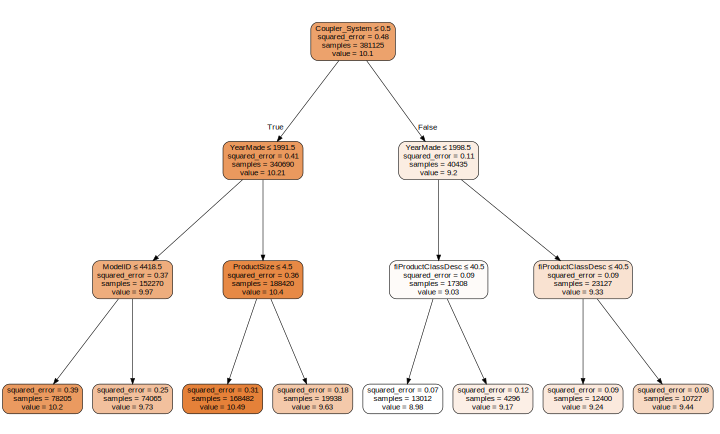

In [101]:
single_tree = m.estimators_[0]
draw_tree(single_tree,
          to.train.xs,  # This should be a DataFrame
          size=10,
          leaves_parallel=True,
          precision=2)

In [102]:
mDtr = DecisionTreeRegressor(max_leaf_nodes=4)
mDtr.fit(to.train.xs,to.train.y);

## Visualisation but Decission Tree Regressor required to Pass

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


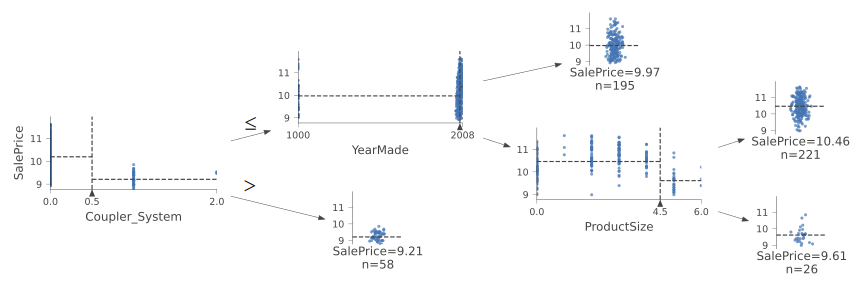

In [103]:
dep_var='SalePrice'
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(mDtr, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [104]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(to.train.xs,to.train.y)

RandomForestRegressor(bootstrap=False, n_estimators=1, n_jobs=-1)

## Score
- here score is 1 because we have only one sample
- validation set is less so its overfit

In [105]:
m.score(to.valid.xs,to.valid.y), m.score(to.train.xs,to.train.y)

(0.7358502417542381, 1.0)

In [106]:
print_score(m,to)

AttributeError: 'numpy.ndarray' object has no attribute 'contiguous'

In [107]:
mDtr.get_n_leaves(), len(to.train.xs)


(4, 381125)

# Highlights 4

## R square
- tells how much data vary
- Stot = (every predicted - mean) how much data vary from mean
- SSres = Fi - mean function we are interested in
- R square can be anything less than 1
- somethimes you predict negative value when that happen your model worse than predicting mean.
- its not necessarily what u are optimised
- useful number to find if our function os closed or not to data

<img src="https://miro.medium.com/v2/resize:fit:984/format:webp/1*tiu0Zw6grKXPvtIYESpRkQ.png" />

- yi : actual/target data

- ȳ : the average (mean)

- SStot: how much the data vary

- The simplest non-stupid model we came up with last week was create a column of the mean and submit that to Kaggle. In that case, RMSE = SStot (i.e. RMSE of a naïve model)

- fi: predictions

- SSres is RMSE of the actual model

- If we were exactly as effective as just predicting the mean, SSres/SStot = 1 and R² = 0

- If we were perfect (i.e. yi = fi for all cases), SSres/SStot = 0 and R² = 1

**Note : Ratio between how Good model vs Naive model**

## R square Interpretation
- it could be 1 but it can be good for trained data but should check for validation
- Correct answer: Anything equal to or less than 1. If you predicted infinity for every row, R² = 1 −∞

So when your R² is negative, it means your model is worse than predicting the mean.

R² is not necessarily what you are actually trying to optimize, but it is a number you can use for every model and you can start to get a feel of what .8 looks like or what .9 looks like. Something you may find interesting is to create synthetic 2D datasets with different amounts of random noise, and see what they look like on a scatterplot and their R² to get a feel of how close they are to the actual value.

R² is the ratio between how good your model is (RMSE)vs. how good is the naïve mean model (RMSE).

## HyperParameter Setting

- We do not choose randomly
- P hacking tryong different variation until things work we will not do that
- one_hot_encoding vs converting to numbers of string

## Why not Randomly pick Validation Points
- we are not replicating test sets so thats why
- everywhere there is timeline we need forcasting

## Data Science VS Software Eng
- For your own work one way go is good
- PEP 8 is standard of writng python code

In [108]:
TabularPandas??

Init signature:
TabularPandas(
    df,
    procs=None,
    cat_names=None,
    cont_names=None,
    y_names=None,
    y_block=None,
    splits=None,
    do_setup=True,
    device=None,
    inplace=False,
    reduce_memory=True,
)
Source:        
class TabularPandas(Tabular):
    "A `Tabular` object with transforms"
    def transform(self, cols, f, all_col=True):
        if not all_col: cols = [c for c in cols if c in self.items.columns]
        if len(cols) > 0: self[cols] = self[cols].transform(f)
File:           /usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py
Type:           type
Subclasses:     


## Bagging
- Some models, e.g., 5 models, have different insights somewhat correlated.
- averaging model prediction
- massively overfit trees random 1/10th of data and we did it 100 times
- but we have different random samples
- errors we have will random
- average of random errors is zero.
- What's left is true relationship
- scikit learn its pick out with replacement
- n rows with replacement—we are doing that



In [109]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
m.fit(to.train.xs, to.train.y)

RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [116]:

def rmse_np(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))


def print_score_tr(tr, to):
    X_train = to.train.xs.values
    y_train = to.train.y.values
    X_valid = to.valid.xs.values
    y_valid = to.valid.y.values

    return pd.DataFrame([[
        rmse_np(tr.predict(X_train), y_train),
        rmse_np(tr.predict(X_valid), y_valid),
        tr.score(X_train, y_train),
        tr.score(X_valid, y_valid)
    ]], columns=["Train RMSE", "Valid RMSE", "Train R^2", "Valid R^2"])


In [117]:
all_scores= []

for tr in m.estimators_:
    row = print_score_tr(tr, to).iloc[0]  # this is a Series, not a DataFrame
    all_scores.append(row)

df_scores = pd.DataFrame(all_scores)
df_scores = df_scores.reset_index(drop=True)

df_scores

,Train RMSE,Valid RMSE,Train R^2,Valid R^2
0,0.183440,0.381885,0.929540,0.733633
1,0.180503,0.404893,0.931779,0.700569
2,0.182371,0.366883,0.930360,0.754149
3,0.181794,0.388153,0.930799,0.724816
4,0.180530,0.387984,0.931758,0.725056
5,0.181418,0.412921,0.931086,0.688577
6,0.182272,0.377400,0.930435,0.739852
7,0.182470,0.377553,0.930284,0.739641
8,0.181297,0.390419,0.931177,0.721594
9,0.181824,0.404029,0.930776,0.701845


In [118]:
print([df_scores.iloc[:i,3].mean(0) for i in range(10)])

[nan, 0.7336326345019382, 0.7171007440793089, 0.7294500854619681, 0.7282916830490846, 0.7276444592912013, 0.7211331885419948, 0.7238073674763357, 0.7257865745969979, 0.7253207550334868]


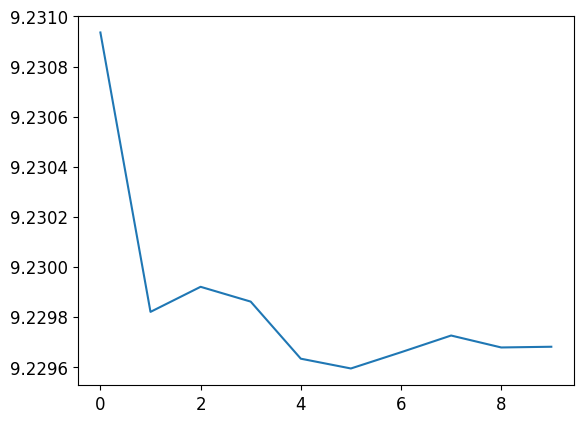

In [121]:
def rmse_np(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

# Now this line should work (but may still be logically incorrect depending on df_scores content)
plt.plot([rmse_np(df_scores.iloc[:i,2].mean(0), to.valid.y.values) for i in range(1, 11)])


## Increasing Trees

- doubling trees
- at some point you have to stop estimators
- adding more tree slow down
- In practice 20-30 trees
- In the wnd of day 1000 of trees over the night
- each tree may have different combination of features - different break points of different value of columns

In [ ]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, 
                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


In [ ]:
m = RandomForestRegressor(n_estimators=30, n_jobs=-1, 
                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


## OOB Score Dataset small Validation set extraction issue
- someimes dataset is small
- dont want to pull out validation set
- cool trick : some of rows in first tree did not use - validation set different for each tree same for other trees  then we make the average of those
- which is Out of Bag Samples
- in general oob r square underestimate
- In practice its usually good the more tree u add

In [ ]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, 
                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


## Grid Search for hyperparameter setting OOB score is great choice for that
- why not pick totally different subset

In [ ]:
# write code to prepare the data

## Make dataset Small for Experiment

In [ ]:
## read dataset again
set_rf_sample(20000) # only take consectively subset

## Compare Tree
- set_rf_samples
- we need to turn off oob score

In [ ]:
m = RandomForestRegressor( n_jobs=-1, 
                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


## Min sample Leaf
- stop growing tree
- possible values :1,3,5,10,25
- sometimes if big dataset 100 or 1000

In [ ]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1
                          ,min_sample_leaf=3,
                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


## Max Sample
- one column is important imagine all the trees start with that
- in practice we need uncoorelated trees
- interaction is more important sometimes
- if split on same thing we will not have much interaction
- so every split we can have different subset of rows and columns
- every possible level random subset of column
- each time split we use tandom subset

possible value 0.5 log2 sqrt

In [ ]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1
                          ,min_sample_leaf=3,
                          max_features=3

                          oob_score=True)
m.fit(to.train.xs,to.train.y)
print_score(m)


## Linear Model vs RF
- RF is reliable for grouping data whereas Linear model can put us in wrong direction

In [ ]:
df_raw.fiProductClassDesc,cat.categories

In [ ]:
df_raw.fiProductClassDesc,cat.codes